# Factory Simulation

Welcome to the **P**aper **C**rafting **C**onglomerate, or PCC for short. We run a sophisticated manufacturing operation where we transform paper into fantastic and valuable products that our customers love. We've brought you here to make our operations even better. 

## Your Tasks Today

You are provided with a description of the operations at this factory, and a baseline configuration of a factory simulation tool defined using the `simpy` Python package.

Over the course of this workshop, you will collaborate with your workshop colleagues to work through the following tasks:

1. Define the process characteristicts.
    * The setup and cycle times in the `Resources` table below are complete fabrications. Before you can run a credible simulation, you need to come up with credible estimates for the setup time for each resource, as well as the average and standard deviation of the cycle times.
    * Yes, the above assumes normality. Are your distributions normal? That's for you to decide!
    * Divide into groups of 1 "recorder" and 1 or 2 "operators" (depending on the `num_operators` field in the `Resources` table)
    * Record the setup time and cycle time required to perform at least 10 iterations of your process. Is that enough to characterize it?
    * Update the input tables with real data captured from observing the process.
2. Simulate the baseline process
    * Run the simulation in the main cell below.
    * Record how much revenue was generated over time during the simulation.
    * Plot the queue sizes over time for each piece of equipment (and operators). Can you identify a bottleneck?
    * How varied are the simulation results over repeat runs?
        * Wrap the simulation in a `for` loop to perform multiple realizations. 
        * Plot histograms of some of your key process outcomes.
3. Operate the factory in the baseline configuration
    * Run for 10 minutes
    * You'll be provided with an automated ordering system that will issue new orders into the shop in the same way the simulation does
    * Record the output of your factory at the end of 10 minutes - compare to the histograms from Task 2. Did the actual results fall within the expected range of outcomes? Why or why not?
4. Refine the simulation
    * Based on what you observed in actually running the plant, how should we change the simulation code to better reflect the reality of operations in the Paper Crafting Conglomerate plant?
    * Make those changes and show the effect they have on the simulation
5. Identify bottleneck(s)
    * With your new-and-improved simulation, take a look at key metrics over the course of your simulation run.
    * Where is WIP building up?
    * What equipment is the most underutilized?
6. Sensitivity Studies
    * Use the `simpy` simulation to show the effect on the expected distribution of revenue outcomes if you change the number of:
        * operators
        * staplers
        * scissors
        * ...
    * Break into groups and brainstorm other aspects to change
7. Define and Simulate Improvements
    * Taking into account what you learned from the sensitivity studies, and any additional opportunities for improvement, propose some changes to make to the process or plant
    * Modify the simulation to show the expected effects of your proposed changes
    * Generate some graphs from the simulation output that you could include in a business case for the improvements
    * How might your recommendations change if adding a new piece of equipment cost $10 / minute? $20 / minute?
8. Run the new-and-improved process
    - With the entire group, downselect a set of proposed changes, and run the plant according to the new design
    - What 📈 in revenue did you achieve?
    - How does the result compare to the expected improvement from running the simulation?
9. Process mining
    * Use the `PM4Py` package on the logs generated by a simulation run to extract the process flow.
    * A separate notebook will be provided with a basic example to get you started 
10. Optimized scheduler
    * Using the `ortools` package, take the same inputs used in this simulation, plus a backlog of orders. We will exercise linear programming tools to produce an optimal schedule for our plant.
    * A separate notebook will be provided with a basic example to get you started 

## Helpful information

Simpy Documentation: [link](https://simpy.readthedocs.io/en/latest/)
* A `.pdf` copy of the documentation is included in the SharePoint folder with this notebook

Seaborn Gallery: [useful examples for plotting](https://seaborn.pydata.org/examples/index.html)

## Process

This section describes the process used in our factory. We will discuss raw input materials, operations, personnel, and output products.

### Resources

| name            |   num_units |   num_operators |   capacity_per_unit |   setup_time |   cycle_time_mean |   cycle_time_std |
|:----------------|------------:|----------------:|--------------------:|-------------:|------------------:|-----------------:|
| stapler         |           1 |               2 |                   1 |           25 |                25 |                4 |
| glue            |           4 |               1 |                     |           18 |               120 |               30 |
| scissors        |           3 |               1 |                     |           18 |                48 |               24 |
| folding_station |          99 |               1 |                     |           18 |                16 |                8 |
| hole_punch      |           1 |               1 |                     |           10 |                12 |                4 |

### Operations

An operation is an activity performed on one or more inputs, using 0, 1, or more assets, and 1 or more personnel.

| name                      | id   | resources           |
|:--------------------------|:-----|:--------------------|
| Staple Top Left Corner    | S_tl | ['stapler']         |
| Staple Bottom Left Corner | S_bl | ['stapler']         |
| Glue                      | G1   | ['glue']            |
| Fold Diagonal             | F_d  | ['folding_station'] |
| Cut Notch                 | C_n  | ['scissors']        |
| Cut Circle                | C_c  | ['scissors']        |
| Punch Hole                | P_h  | ['hole_punch']      |
| Fold in Half              | F_h  | ['folding_station'] |

### Personnel

Each process requires 1 or more operators. At the beginning of this exercise, we have 5 operators working in the factory. They are summoned to each resource **when a job is ready to start at that resource**. 
All operators are cross-trained and can operate any piece of equipment. 

The operators do double duty as maintenance crew. When a machine breaks, the next available operator (they do not interrupt active work) goes to that machine and takes 10 seconds to repair it.

### Products / Materials

A product is the result of taking the raw materials through a series of operations, defined by that product's router.

| name               | type                 | inputs                    | recipe                                |   sales_price |   initial_qty |
|:-------------------|:---------------------|:--------------------------|:--------------------------------------|--------------:|--------------:|
| supercrane         | finished_good        | ['copy_paper', 'staple']  | ['S_tl', 'C_n', 'G1']                 |          24   |               |
| birthday_card      | finished_good        | ['folded_card', 'staple'] | ['F_h', 'S_tl', 'G1']                 |           8.5 |               |
| holey_folder       | finished_good        | ['folded_card', 'staple'] | ['S_tl', 'P_h', 'P_h', 'P_h', 'S_bl'] |           9.1 |               |
| folded_card        | intermediate_product | ['construction_paper']    | ['F_h']                               |               |               |
| triangle           | finished_good        | ['copy_paper']            | ['F_d', 'G1']                         |          16.2 |               |
| 2_ply_circle       | finished_good        | ['copy_paper']            | ['C_c', 'G1']                         |          37   |               |
| copy_paper         | raw_material         | []                        | []                                    |               |           100 |
| construction_paper | raw_material         | []                        | []                                    |               |            25 |
| staple             | raw_material         | []                        | []                                    |               |           200 |



In [ ]:
#### Run this cell to install simpy before running the rest of the notebook if you are using Google Colab
!pip install simpy

In [2]:
import pandas as pd
import numpy as np
import simpy
import random

import uuid # use this for generating IDs for event logging
from contextlib import ExitStack # this is used for creating "with" context managers with arbitrary numbers of concurrent objects

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_materials = pd.DataFrame(
    [
        {
            'name': 'supercrane',
            'type': 'finished_good',
            'inputs': ['copy_paper','staple'],
            'recipe': ['S_tl','C_n','G1'],
            'sales_price': 24,
        },
        {
            'name': 'birthday_card',
            'type': 'finished_good',
            'inputs': ['folded_card','staple'],
            'recipe': ['F_h','S_tl','G1'],
            'sales_price': 8.5,
        },
        {
            'name': 'holey_folder',
            'type': 'finished_good',
            'inputs': ['folded_card','staple'],
            'recipe': ['S_tl','P_h','P_h','P_h','S_bl'],
            'sales_price': 9.10,
        },
        {
            'name': 'folded_card',
            'type': 'intermediate_product',
            'inputs': ['construction_paper'],
            'recipe': ['F_h'],
        },
        {
            'name': 'triangle',
            'type': 'finished_good',
            'inputs': ['copy_paper'],
            'recipe': ['F_d','G1'],
            'sales_price': 16.2,
        },
        {
            'name': '2_ply_circle',
            'type': 'finished_good',
            'inputs': ['copy_paper'],
            'recipe': ['C_c','G1'],
            'sales_price': 37,
        },
        {
            'name': 'copy_paper',
            'type': 'raw_material',
            'inputs': [],
            'recipe': [],
            'initial_qty': 100
        },
        {
            'name': 'construction_paper',
            'type': 'raw_material',
            'inputs': [],
            'recipe': [],
            'initial_qty': 25
        },
        {
            'name': 'staple',
            'type': 'raw_material',
            'inputs': [],
            'recipe': [],
            'initial_qty': 200
        },
    ]
)


df_operations = pd.DataFrame(
    [
        {
            'name': 'Staple Top Left Corner',
            'id' : 'S_tl',
            'resources': ['stapler'],
        },
        {
            'name': 'Staple Bottom Left Corner',
            'id' : 'S_bl',
            'resources': ['stapler'],
        },
        {
            'name': 'Glue',
            'id':'G1',
            'resources': ['glue'],
        },
        {
            'name': 'Fold Diagonal',
            'id':'F_d',
            'resources': ['folding_station'],
        },
        {
            'name': 'Cut Notch',
            'id':'C_n',
            'resources': ['scissors'],
        },
        {
            'name': 'Cut Circle',
            'id':'C_c',
            'resources': ['scissors'],
        },
        {
            'name': 'Punch Hole',
            'id':'P_h',
            'resources': ['hole_punch'],
        },
        {
            'name': 'Fold in Half',
            'id':'F_h',
            'resources': ['folding_station'],
        },
    ]
)

df_resources = pd.DataFrame(
    [
        {
            'name': 'stapler',
            'num_units' : 1,
            'num_operators': 2,
            'capacity_per_unit': 1,
            'setup_time': 0.25,
            'cycle_time_mean': 1.8,
            'cycle_time_std': .29,
        },
        {
            'name': 'glue',
            'num_units' : 4,
            'setup_time': 2,
            'num_operators': 1,
            'cycle_time_mean': 4.1,
            'cycle_time_std': 1,
        },
        {
            'name': 'scissors',
            'num_units' : 3,
            'setup_time': 1,
            'num_operators': 1,
            'cycle_time_mean': 2,
            'cycle_time_std': 1,
        },
        {
            'name': 'folding_station',
            'num_units' : 99, # we don't actually have 99 units, but since no physical equipment is required for folding, it is only constrained by available operators
            'setup_time': 1,
            'num_operators': 1,
            'cycle_time_mean': 5.22,
            'cycle_time_std': .8,
        },
        {
            'name': 'hole_punch',
            'num_units' : 1,
            'setup_time': 1,
            'num_operators': 1,
            'cycle_time_mean': 5,
            'cycle_time_std': .81,
        },
    ]
)

In [4]:
df_materials

,name,type,inputs,recipe,sales_price,initial_qty
0,supercrane,finished_good,"[copy_paper, staple]","[S_tl, C_n, G1]",24.0,NaN
1,birthday_card,finished_good,"[folded_card, staple]","[F_h, S_tl, G1]",8.5,NaN
2,holey_folder,finished_good,"[folded_card, staple]","[S_tl, P_h, P_h, P_h, S_bl]",9.1,NaN
3,folded_card,intermediate_product,[construction_paper],[F_h],NaN,NaN
4,triangle,finished_good,[copy_paper],"[F_d, G1]",16.2,NaN
5,2_ply_circle,finished_good,[copy_paper],"[C_c, G1]",37.0,NaN
6,copy_paper,raw_material,[],[],NaN,100.0
7,construction_paper,raw_material,[],[],NaN,25.0
8,staple,raw_material,[],[],NaN,200.0


## Run the Simulation

In [9]:
"""
Machine shop example

Covers:

- Interrupts
- Resources: PreemptiveResource

Scenario:
  A workshop has *n* identical machines. A stream of jobs (enough to
  keep the machines busy) arrives. Each machine breaks down
  periodically. Repairs are carried out by one operator. The operator
  has other, less important tasks to perform, too. Broken machines
  preempt these tasks. The operator continues them when he is done
  with the machine repair. The workshop works continuously.

Modify the below so that:

An Order is created;
An Order steps through a sequence of operations, where in each operation:
    The Order requests a Machine
    The Machine requests an operator (repace operator with operator in the script)
    Once the Operator arrives at the machine, the machine and operator are busy for Setup time + Cycle time
    Then the Operation is complete, and the Order moves on to the next operation

"""


RANDOM_SEED = 42
MTTF = 600.0           # Mean time to failure in seconds
REPAIR_TIME = 15.0     # Time it takes to repair a machine in seconds
NUM_OPERATORS = 5      # 
MINUTES = 5              # Simulation time in minutes
SIM_TIME = MINUTES * 60  # Simulation time in seconds
ORDER_INTERVAL = 3   # Time between orders being started in seconds

LOGGING_INTERVAL = 10 # Time between logging

event_log = pd.DataFrame({'Case_ID': pd.Series(dtype='str'),
                   'Activity': pd.Series(dtype='str'),
                   'Timestamp': pd.Series(dtype='float')})

def log_event(case_ID, activity, timestamp):
    """Log an event to the event log."""
    event_log.loc[len(event_log)] = [case_ID, activity, timestamp]
    

def normal_cycle_time(mean,sigma):
    """Return actual processing time for a concrete part."""
    return np.max([0,np.random.normal(mean, sigma)])


def time_to_failure():
    """Return time until next failure for a machine."""
    return np.random.exponential(MTTF)


class Order(object):
    """An order is a list of steps that are required to make a requested product

    For each step of the order, the required machine is requested, queueing the Order
    at that machine.

    """
    def __init__(self, env, name, row):
        self.env = env
        self.name = name
        self.steps = row.recipe.item()
        self.material = row.name.item()
        self.inputs = row.inputs.item()
        self.revenue = row.sales_price.item()
        self.created_at = self.env.now
        self.completed_at = None
        self.queued_at_machine = None
        self.complete = False
        self.case_ID = self.name + '_' + str(uuid.uuid4())

        # Now that the order is created start it through the process, iterating through the steps
        self.process = env.process(self.process_order())

    def process_order(self):
        """ First ensure we have any needed inputs """
        input_requests = [] # store the input requests in this list, so we can await fulfillment of all of them
        for requirement in self.inputs:
            input_details = df_materials.loc[df_materials.name == requirement]
            # for raw material types, pull from inventory
            if input_details.type.item() == 'raw_material':
                order = self.env.raw_mat_inventory[input_details.name.item()].get(1)
                print(f'{env.now}: {input_details.name.item()} remaining: {self.env.raw_mat_inventory[input_details.name.item()].level}')
            # for intermediate prodcts, place an Order
            elif input_details.type.item() == 'intermediate_product':
                order = Order(self.env, input_details.name.item(), input_details).process # TODO: increment a number for each item name
            input_requests.append(order)
        yield simpy.AllOf(env, input_requests)

        """Process the order by iterating through the steps."""
        for step in self.steps:
            # select a machine from list env.machines whose name (machine.name) equals the step
            machine_needed = df_operations.loc[df_operations['id'] == step]['resources'].values[0][0]
            machine = self.env.machines[machine_needed]

            print(f'requesting machine {machine_needed} for {self.name} at {env.now = }')
            yield self.env.process(machine.work()) # machine will request operator and do setup/cycle
            log_event(self.case_ID, machine_needed, env.now)
            print(f'Completed work on machine {machine_needed} for {self.name}  at {env.now = }')

        self.complete = True
        self.completed_at = self.env.now



class Machine(object):
    """A machine produces parts and my get broken every now and then.

    If it breaks, it requests a *operator* and continues the production
    after the it is repaired.

    A machine has a *name* and a number of *parts_made* thus far.

    """
    def __init__(self, env, name, setup_time, cycle_time_mean, cycle_time_std, operators_required, num_units):
        self.env = env
        self.name = name
        self.setup_time = setup_time
        self.cycle_time_mean = cycle_time_mean
        self.cycle_time_std = cycle_time_std
        self.operators_required = operators_required
        self.capacity = num_units
        
        self.throughput = 0
        self.broken = 0
        self.working_count = 0

        # Start "working" and "break_machine" processes for this machine.
        # attach machine to environment as a Preemptive Resource so we can interrupt it
        self.resource = simpy.PreemptiveResource(env, capacity=self.capacity) 
        #self.process = env.process(self.working(operator))
        env.process(self.break_machine())

    def work(self):
        """
        
        Request the operator(s) needed for the job
        Once operators are available, start setup then working.

        A machine may break at random intervals - when that happens, will need to request another operator (playing the role of maintenance)


        """
    
        # Start making a new part
        setup_time = self.setup_time
        cycle_time = normal_cycle_time(self.cycle_time_mean,self.cycle_time_std)
        done_in = cycle_time
        priority = 1 # start request at 1, but if this job gets interrupted due to breaking, set lower, to make sure same job goes back on
        while done_in > 0:
            try:
                with self.resource.request(priority=priority) as req_machine:
                    with ExitStack() as stack: #context manager trick for combining unkown length of CMs
                        operator_reqs = []
                        for operator_id in range(self.operators_required):
                            operator_req = self.env.operator.request(priority=1)
                            stack.enter_context(operator_req)
                            operator_reqs.append(operator_req)

                        start = None # we haven't started yet
                        working = False
                        yield simpy.events.AllOf(env,[req_machine] + operator_reqs) # wait for machine and all needed operators to be ready
                        self.working_count += 1 # count the machine as working once it and its operators are allocated
                        working = True
                        yield self.env.timeout(setup_time)
                        start = self.env.now
                        yield self.env.timeout(done_in)
                        self.working_count -= 1 # we are no longer working on this job
                        working = False
                        done_in = 0  # Set to 0 to exit while loop.
            except simpy.Interrupt:
                priority = 0 # lower priority so interrupted job gets machine back first
                self.broken += 1
                print(f'{self.name} broke at {self.env.now = }')
                if working:
                    self.working_count -= 1 # we are no longer working on this job
                if start:
                    # if the work was started, we only need to complete the unfinished portion
                    # TODO make it optional depending on type of step whether full cycle time needs to be run
                    done_in -= self.env.now - start  # subtract the elapsed cycle time from done_in
                # Request another operator (for repairs).- use a higher priority. Since operators are not a preemptive resource, will still wait until one is free
                with self.env.operator.request(priority=0) as req:
                    yield req
                    yield self.env.timeout(REPAIR_TIME)
                
                print(f'{self.name} repaired at {self.env.now = }')
                self.broken -= 1

        # Part is done.
        self.throughput += 1

        return None

    def break_machine(self):
        """Break the machine every now and then."""
        while True:
            yield self.env.timeout(time_to_failure())
            if self.broken == 0:
                # Only break the machine if it is currently working.
                # issue a high priority (lower number) request that will preempt the existing job
                with self.resource.request(priority = -100) as req:
                    yield req


# Setup and start the simulation
print('Paper Crafting Conglomerate\n📜📜📜📜📜📜📜📜📜\n')
random.seed(RANDOM_SEED)  # This helps to reproduce the results

# Create an environment and start the setup process
env = simpy.Environment()
operator = simpy.PriorityResource(env, capacity=NUM_OPERATORS)
machines = {}
for row in df_resources.itertuples():
    machines[row.name] = Machine(env,row.name,row.setup_time,row.cycle_time_mean,row.cycle_time_std,row.num_operators,row.num_units)

env.machines = machines
env.operator = operator

# create orders for the shop
orders = []
env.orders = orders
def generate_orders(env):
    while True:
        i = len(env.orders)
        row = df_materials.loc[df_materials.type == 'finished_good',:].sample(1)
        print(f'Order {i} for {row.name.item()} placed at {env.now = }')
        env.orders.append(
            Order(env, 'Order %d' % i, row)
        )
        yield env.timeout(ORDER_INTERVAL)

env.process(generate_orders(env))

plant_state_accumulator = []

def log_plant_state(env):
    while True:
        plant_state_dict = {
            'time': env.now,
            'revenue': 0,
        }

        
        # record the queue, throughput, and utilization for each type of machine
        for machine in env.machines:
            plant_state_dict[machine + '_throughput'] = env.machines[machine].throughput
            # The queue calculation below adds active users and subtracts working_count, since a we want to inlcude case when job is allocated to machine but no operators available as part of queue
            plant_state_dict[machine + '_queue'] = len(env.machines[machine].resource.queue) + len(env.machines[machine].resource.users) - env.machines[machine].working_count 
            if machine == 'folding_station':
                # since the folding station has no capital equipment, and we put an arbitrarily high capacity,
                # for its utilization and allocation, we will instead count total number of operators currently folding
                # and total number of allocated jobs, instead
                plant_state_dict[machine + '_utilization'] = env.machines[machine].working_count
                plant_state_dict[machine + '_allocation'] = len(env.machines[machine].resource.users)
            else:
                plant_state_dict[machine + '_utilization'] = env.machines[machine].working_count / env.machines[machine].capacity
                plant_state_dict[machine + '_allocation'] = len(env.machines[machine].resource.users) / env.machines[machine].capacity # this measures proportion of machines allocated to jobs - they may not be working if they are allocated but awaiting operators
                plant_state_dict[machine + '_broken'] = env.machines[machine].broken / env.machines[machine].capacity

        # record the total number of each type of finished good completed
        for order in env.orders:
            if order.complete: #check this boolean property of the Order
                plant_state_dict['revenue'] += order.revenue
                key = order.material + '_completed'
                if key in plant_state_dict:
                    plant_state_dict[key] += 1
                else:
                    plant_state_dict[key] = 1

        plant_state_dict['operators_busy'] = len(env.operator.users)
        plant_state_dict['operators_queue'] = len(env.operator.queue)
        plant_state_dict['operators_utilization'] = len(env.operator.users)/env.operator.capacity

        plant_state_accumulator.append(plant_state_dict) # add this dict to the list in the outer namespace

        yield env.timeout(LOGGING_INTERVAL)


env.process(log_plant_state(env))

def create_raw_material_containers(env):
    stores = {}
    for row in df_materials.loc[df_materials.type=='raw_material',:].itertuples():
        new_key = row.name
        stores[new_key] = simpy.Container(env,init = row.initial_qty)
    return(stores)

env.raw_mat_inventory = create_raw_material_containers(env)

# Execute!
# run the simulation for the desired time. 
# The tiny extra increment ensures the logger runs at the end, assuming LOGGING_INTERVAL is an exact factor of SIM_TIME
env.run(until=SIM_TIME+.0001) 

# Analysis/results
print('Paper shop results after %s minutes:' % MINUTES)
for machine in machines.values():
    print('%s made %d parts.' % (machine.name, machine.throughput))


Paper Crafting Conglomerate
📜📜📜📜📜📜📜📜📜

Order 0 for holey_folder placed at env.now = 0
0: staple remaining: 199.0
0: construction_paper remaining: 24.0
requesting machine folding_station for folded_card at env.now = 0
Order 1 for supercrane placed at env.now = 3
3: copy_paper remaining: 99.0
3: staple remaining: 198.0
requesting machine stapler for Order 1 at env.now = 3
Completed work on machine folding_station for folded_card  at env.now = 4.838131591341084
requesting machine stapler for Order 0 at env.now = 4.838131591341084
Completed work on machine stapler for Order 1  at env.now = 4.977482662404288
requesting machine scissors for Order 1 at env.now = 4.977482662404288
Order 2 for holey_folder placed at env.now = 6
6: staple remaining: 197.0
6: construction_paper remaining: 23.0
requesting machine folding_station for folded_card at env.now = 6
Completed work on machine stapler for Order 0  at env.now = 7.352007406944013
requesting machine hole_punch for Order 0 at env.now = 7.35200

## Inspect the event log and export to csv

In [10]:
event_log

,Case_ID,Activity,Timestamp
0,folded_card_e6095031-1993-4ecf-a5f8-2ff86c314ff1,folding_station,4.838132
1,Order 1_426ad6d5-cf36-49d4-8de2-a94849f27f82,stapler,4.977483
2,Order 0_314671f9-016f-4319-bb4e-fb1232e2a19d,stapler,7.352007
3,Order 1_426ad6d5-cf36-49d4-8de2-a94849f27f82,scissors,9.303696
4,folded_card_0a7e0b5a-5e1d-4fe5-bd83-60702a860bfe,folding_station,11.806938
...,...,...,...
251,Order 89_9bbc0a2b-ee4e-4bf3-ae10-77986f71e9f7,glue,295.432509
252,Order 96_622ea236-2e32-438f-bbed-249a7d24a7ce,scissors,296.691610
253,Order 98_1387bf6c-1c8e-4ea1-8dcf-ec413582cf0b,stapler,296.963387
254,Order 94_aeb05939-ea2e-44c7-b663-d842a62a6b01,glue,299.740865


In [11]:
event_log.to_csv('event_log.csv',index=False)

## Plot Simulation Results

In [12]:
df = pd.DataFrame(plant_state_accumulator)
df.head()

,time,revenue,stapler_throughput,stapler_queue,stapler_utilization,stapler_allocation,stapler_broken,glue_throughput,glue_queue,glue_utilization,...,hole_punch_allocation,hole_punch_broken,operators_busy,operators_queue,operators_utilization,supercrane_completed,2_ply_circle_completed,triangle_completed,holey_folder_completed,birthday_card_completed
0,0,0.0,0,0,0.0,0.0,0.0,0,0,0.00,...,0.0,0.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,10,0.0,2,0,0.0,0.0,0.0,0,0,0.25,...,1.0,0.0,4,0,0.8,NaN,NaN,NaN,NaN,NaN
2,20,61.0,3,0,1.0,1.0,0.0,2,0,0.25,...,1.0,0.0,5,1,1.0,1.0,1.0,NaN,NaN,NaN
3,30,114.2,5,0,0.0,0.0,0.0,4,0,0.50,...,1.0,0.0,5,1,1.0,1.0,2.0,1.0,NaN,NaN
4,40,221.3,7,0,0.0,0.0,0.0,7,0,0.25,...,1.0,0.0,5,1,1.0,2.0,4.0,1.0,1.0,NaN


c:\Users\GWilson01\Documents\Python\VirtualEnvironments\OR_demo\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GWilson01\Documents\Python\VirtualEnvironments\OR_demo\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GWilson01\Documents\Python\VirtualEnvironments\OR_demo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\GWilson01\Documents\Python\VirtualEnvironments\OR_demo\Lib\site-packages\seaborn\_oldcore.py:111

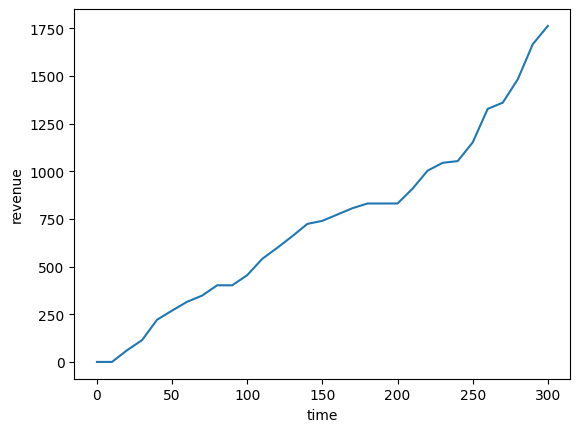

Total revenue at time 300 seconds: 1762.10


In [13]:
# plot the revenue received over time
sns.lineplot(x = 'time', y = 'revenue', data = df)
plt.show()

print(f'Total revenue at time {df["time"].max()} seconds: {df["revenue"].max():.2f}')

c:\Users\GWilson01\Documents\Python\VirtualEnvironments\OR_demo\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GWilson01\Documents\Python\VirtualEnvironments\OR_demo\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GWilson01\Documents\Python\VirtualEnvironments\OR_demo\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GWilson01\Documents\Python\VirtualEnvironments\OR_demo\Lib\site-packages\seaborn\axisgrid.py:118: UserWarn

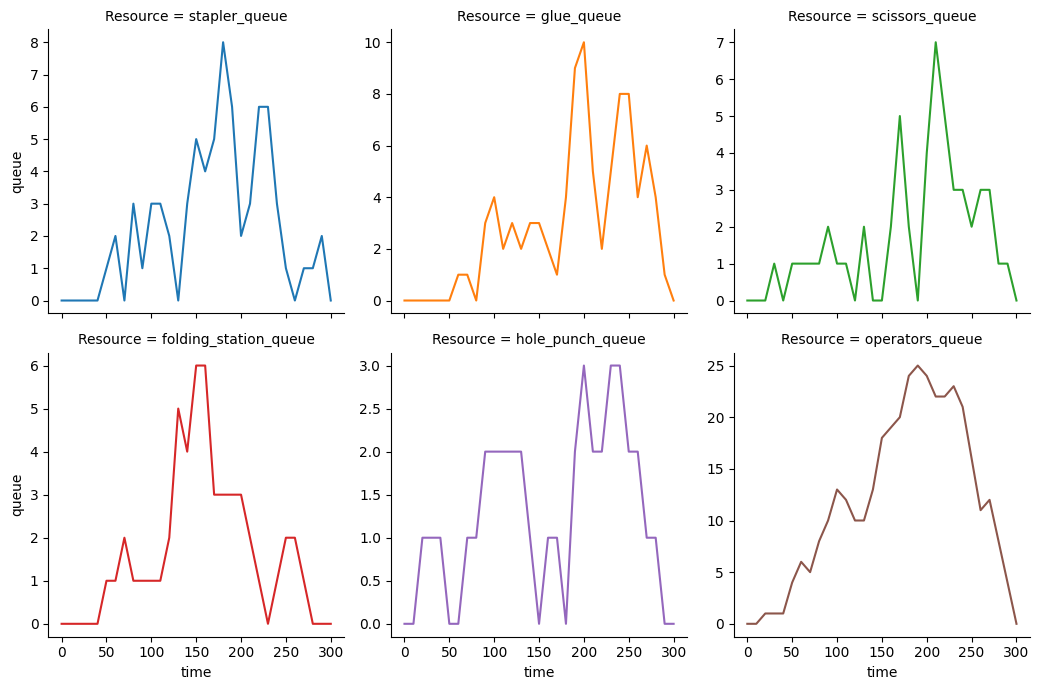

c:\Users\GWilson01\Documents\Python\VirtualEnvironments\OR_demo\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GWilson01\Documents\Python\VirtualEnvironments\OR_demo\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GWilson01\Documents\Python\VirtualEnvironments\OR_demo\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GWilson01\Documents\Python\VirtualEnvironments\OR_demo\Lib\site-packages\seaborn\axisgrid.py:118: UserWarn

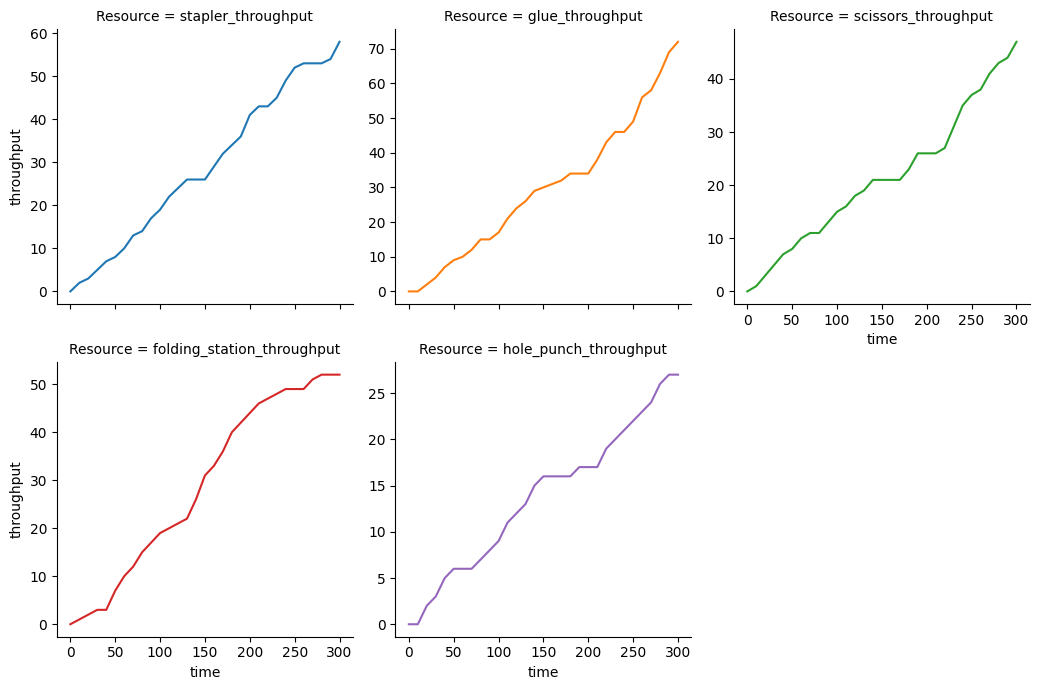

c:\Users\GWilson01\Documents\Python\VirtualEnvironments\OR_demo\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GWilson01\Documents\Python\VirtualEnvironments\OR_demo\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GWilson01\Documents\Python\VirtualEnvironments\OR_demo\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GWilson01\Documents\Python\VirtualEnvironments\OR_demo\Lib\site-packages\seaborn\axisgrid.py:118: UserWarn

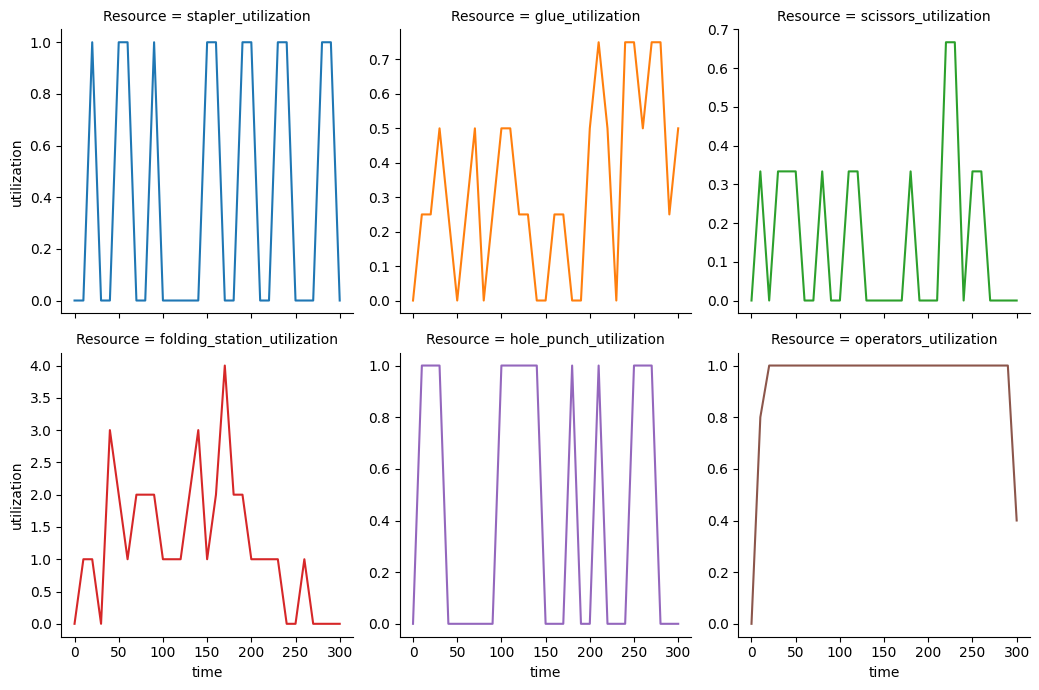

c:\Users\GWilson01\Documents\Python\VirtualEnvironments\OR_demo\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GWilson01\Documents\Python\VirtualEnvironments\OR_demo\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GWilson01\Documents\Python\VirtualEnvironments\OR_demo\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\GWilson01\Documents\Python\VirtualEnvironments\OR_demo\Lib\site-packages\seaborn\axisgrid.py:118: UserWarn

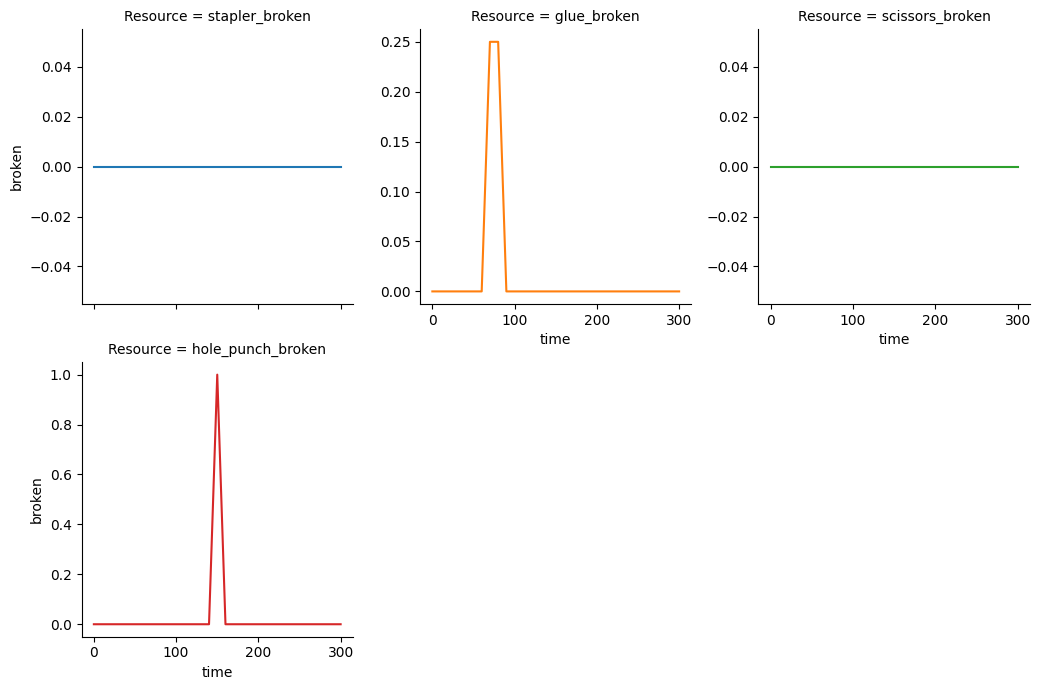

In [14]:
def results_column_plotter(results_df,col_suffix,group_descriptor):
    '''helper function for plotting output'''
    cols = [col for col in results_df.columns if col.endswith('_'+col_suffix)]
    long_results = results_df.melt(id_vars=['time'],value_vars=cols,var_name=group_descriptor,value_name=col_suffix)
    grid = sns.FacetGrid(long_results,col=group_descriptor, hue=group_descriptor, # palette="tab20c",
                         col_wrap=3, height=3.5,sharey=False)
    grid.map(plt.plot, "time", col_suffix)
    plt.show()

results_column_plotter(df,'queue','Resource')
results_column_plotter(df,'throughput','Resource')
results_column_plotter(df,'utilization','Resource')
results_column_plotter(df,'broken','Resource')

🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑

You can stop here - the below is helper code that is not part of the exercise

### Format tables

Write out the dataframes with input data in a markdown format, for easy copy-paste into the introduction section

In [10]:
for key,value in { 'df_resources':df_resources, 'df_operations':df_operations, 'df_materials':df_materials}.items():
    print(f'{key}')
    print(value.to_markdown(index=False))
    print('--------------')

df_resources
| name            |   num_units |   num_operators |   capacity_per_unit |   setup_time |   cycle_time_mean |   cycle_time_std |
|:----------------|------------:|----------------:|--------------------:|-------------:|------------------:|-----------------:|
| stapler         |           1 |               2 |                   1 |           25 |                25 |                4 |
| glue            |           4 |               1 |                 nan |           18 |               120 |               30 |
| scissors        |           3 |               1 |                 nan |           18 |                48 |               24 |
| folding_station |          99 |               1 |                 nan |           18 |                16 |                8 |
| hole_punch      |           1 |               1 |                 nan |           10 |                12 |                4 |
--------------
df_operations
| name                      | id   | resources           |
|:-